In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: xlabel='Outcome', ylabel='Pregnancies'>

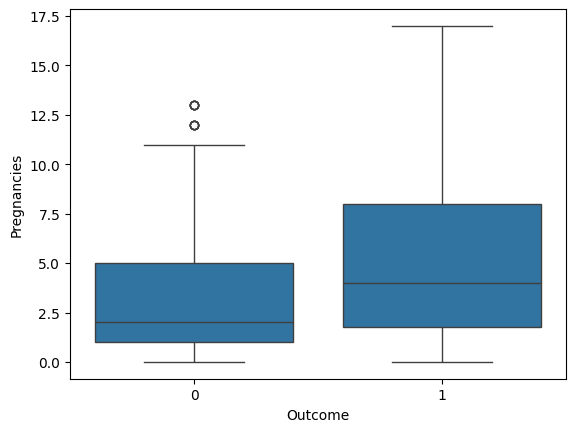

In [5]:
sns.boxplot(x='Outcome', y='Pregnancies', data=df)

<Axes: xlabel='Outcome', ylabel='Glucose'>

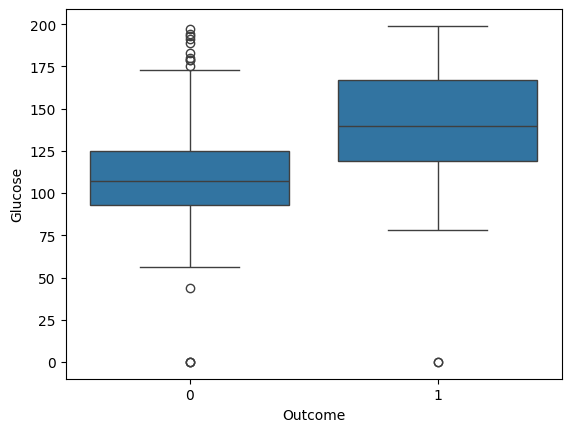

In [6]:
sns.boxplot(x='Outcome', y='Glucose', data=df)

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

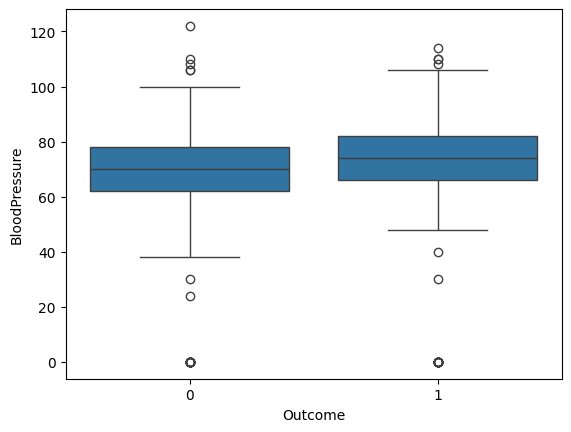

In [7]:
sns.boxplot(x='Outcome', y='BloodPressure', data=df)

<Axes: xlabel='Outcome', ylabel='SkinThickness'>

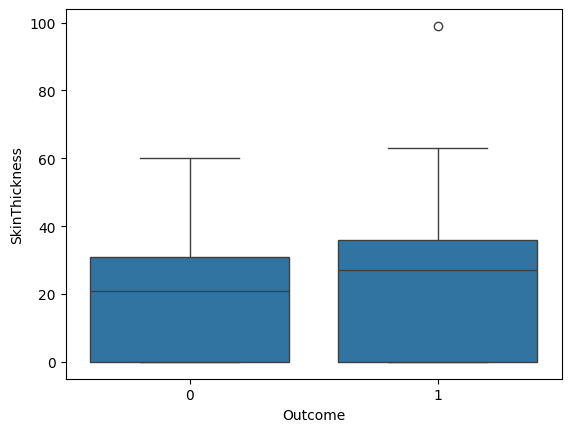

In [8]:

sns.boxplot(x='Outcome', y='SkinThickness', data=df)

In [9]:
from sklearn.ensemble   import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None,n_jobs=-1)
model.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
import shap

/home/vignesh/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


 99%|===================| 1513/1536 [00:13<00:00]        

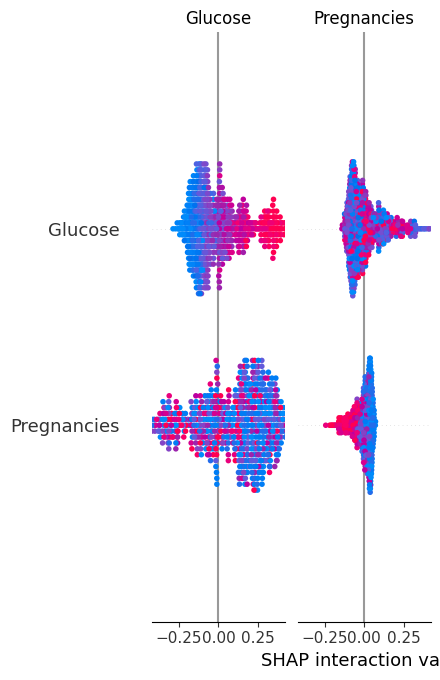

In [12]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

In [13]:
print(X.shape)
print(model.n_features_in_)

(768, 8)
8


In [14]:
print(X.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [15]:
pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

Glucose                     0.267142
BMI                         0.168769
Age                         0.131567
DiabetesPedigreeFunction    0.122695
BloodPressure               0.088660
Pregnancies                 0.085017
Insulin                     0.071547
SkinThickness               0.064604
dtype: float64

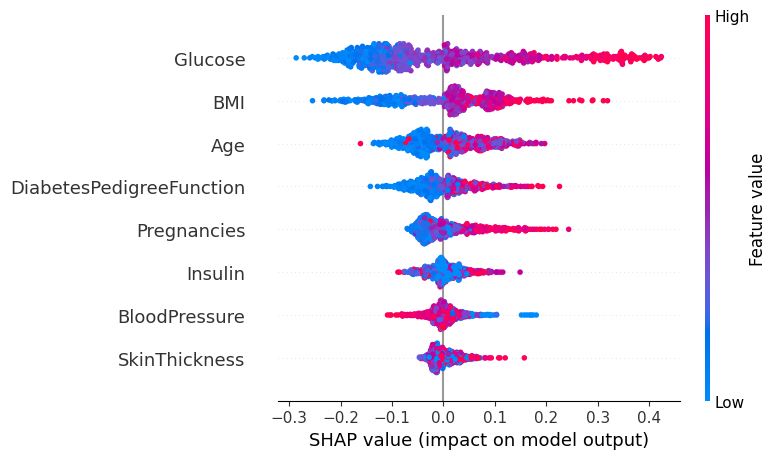

In [16]:
shap.summary_plot(
    shap_values.values[:, :, 1],  # class 1 (diabetes)
    X,
    max_display=8
)

In [18]:
df_summary = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

In [19]:
df_summary

,feature,importance
1,Glucose,0.267142
5,BMI,0.168769
7,Age,0.131567
6,DiabetesPedigreeFunction,0.122695
2,BloodPressure,0.088660
0,Pregnancies,0.085017
4,Insulin,0.071547
3,SkinThickness,0.064604
